<a href="https://colab.research.google.com/github/RonnyGuevara/Digital_image_processing_2023/blob/main/TP_FINAL/TP_FINAL_CURSO_IMAGENES_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

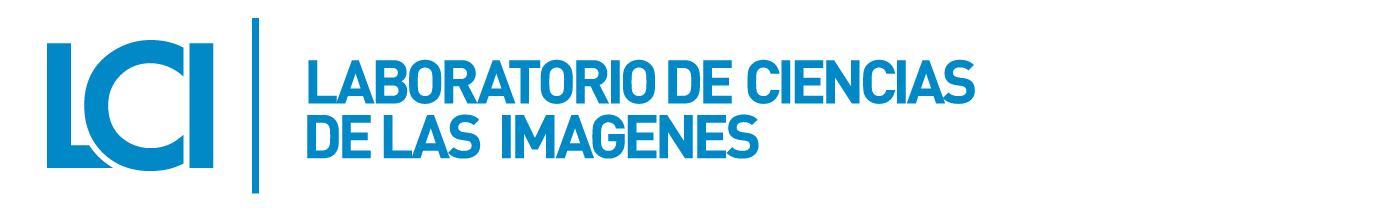

#**Universidad Nacional del Sur**
#Trabajo de Final Cátedra
##Imágenes & Introducción al Aprendizaje automático
##Tema: Asociación entre el IMC, la ansiedad y la depresión

##Presentado por: Ronny Guevara
###Bahía Blanca - Argentina

El presente trabajo final de cátedra tiene como objetivo predecir el IMC de un individuo a partir de los resultados de los test psicológicos BECK y STAI. Para ello, se presenta a continuación la hipótesis, metodología y resultados.

El presente estudio busca a partir de los resultados de los test de STAI y BDI obtener espacio de características o feacture space (FS) para predecir el IMC en mujeres. Esto es, se busca en el marco del presente trabajo responder a las siguientes preguntas: ¿es posible que la ansiedad y la depresión se correlacionen con el IMC?, ¿es posible determinar el IMC sin que intervenga el peso y la talla? y ¿qué variables tienen mayor peso en la predicción del algoritmo?


# 1. Análisis de los datos

In [ ]:
#Lectura de librerías
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Funciones a utilizar
def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)

    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

In [ ]:
#Montamos el drive para lectura de la data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ETL_.xlsx')
df.head(10) #Esta función devuelve las primeras n filas del objeto se según la posición.

,Edad,Altura,Peso,Tipo de depresion,Tipo de ansiedad,Tipo de sobrepeso,IMC
0,Entre 50 y 59 años,1.50,65.0,Sin depresion,Ansiedad sobre promedio mujeres,Sobrepeso,28.888889
1,Entre 20 y 29 años,1.65,61.0,Sin depresion,Ansiedad sobre promedio mujeres,Rango normal,22.405877
2,Entre 40 y 49 años,1.52,105.0,Depresion moderada mujeres,Ansiedad sobre promedio mujeres,Obesas Clase 3,45.446676
3,Entre 20 y 29 años,1.60,54.0,Sin depresion,Ansiedad sobre promedio mujeres,Rango normal,21.093750
4,Entre 40 y 49 años,1.65,64.0,Sin depresion,Ansiedad promedio mujeres,Rango normal,23.507805
5,Entre 50 y 59 años,1.51,67.0,Sin depresion,Ansiedad tend. promedio mujeres,Sobrepeso,29.384676
6,Entre 50 y 59 años,1.74,94.0,Depresion leve mujeres,Ansiedad promedio mujeres,Obesas Clase 1,31.047695
7,Entre 40 y 49 años,1.54,82.0,Sin depresion,Ansiedad sobre promedio mujeres,Obesas Clase 1,34.575814
8,Entre 30 y 39 años,1.60,51.0,Depresion grave mujeres,Ansiedad grave mujeres,Rango normal,19.921875
9,Entre 30 y 39 años,1.60,69.0,Sin depresion,Ansiedad sobre promedio mujeres,Sobrepeso,26.953125


In [ ]:
#Visualización de los atributos
df.columns

Index(['Edad', 'Altura', 'Peso', 'Tipo de depresion', 'Tipo de ansiedad',
       'Tipo de sobrepeso', 'IMC'],
      dtype='object')

##1.1. Valores nulos

In [ ]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               74 non-null     object 
 1   Altura             74 non-null     float64
 2   Peso               74 non-null     float64
 3   Tipo de depresion  74 non-null     object 
 4   Tipo de ansiedad   74 non-null     object 
 5   Tipo de sobrepeso  74 non-null     object 
 6   IMC                74 non-null     float64
dtypes: float64(3), object(4)
memory usage: 4.2+ KB


In [ ]:
#Eliminamos el atributo 'Unnamed: 32' y 'id' dado que no aportan significancia
df = df.drop(['Edad'], 1)

In [ ]:
#Cuenta los valores nulos para cada columna
df.isnull().values.sum()

0

##1.2. Valores atípicos
Verificación de valores atípicos utilizando box plot

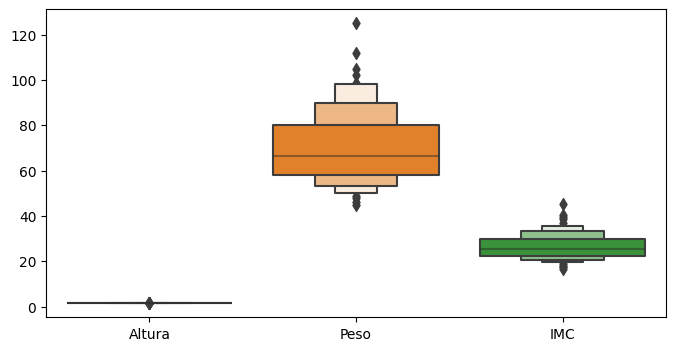

In [ ]:
plt.figure(figsize = (8, 4))
sns.boxenplot(data = df, width = 0.8)
plt.show()

##1.3. Estadística descriptiva

In [ ]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Altura,Peso,IMC
count,74.000000,74.000000,74.000000
mean,1.625811,70.381081,26.585722
std,0.065835,16.652654,5.834378
min,1.440000,45.000000,16.528926
25%,1.592500,58.000000,22.146735
50%,1.625000,66.500000,25.233893
75%,1.657500,80.000000,29.865328
max,1.780000,125.000000,45.446676


Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [ ]:
df.corr()

,Altura,Peso,IMC
Altura,1.000000,0.359658,-0.012133
Peso,0.359658,1.000000,0.924868
IMC,-0.012133,0.924868,1.000000


<Axes: >

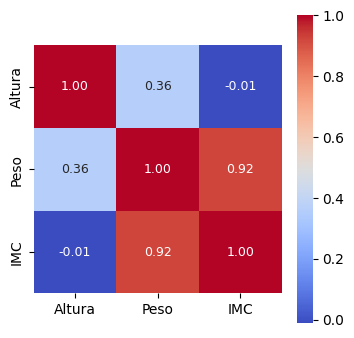

In [ ]:
corr = df.corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Interpretación de la sección
La dataset está conformada de 7 atributos y 74 filas. Respecto a los atributos, 3 son numéricos y 4 son objetos, el atributo 'Edad' no aporta significancia al estudio, por tanto, se procede a su eliminación. Los atributos tipo de depresión, tipo de ansiedad y tipo de sobrepeso contienen variables ordinales, se requiere aplicar algun método de codificación de variables.
Se observa fuerte correlación entre el peso y el IMC.
Debido a la naturaleza de las variables es necesario adaptar a una forma coherente, donde el contenido y el formato sean iguales.

##1.4. Solvencia de problemas

###1.4.1. Codificación Dummy (one-hot encoding)

In [ ]:
# Codificar la variable categórica utilizando variables dummy
df_encoded = pd.get_dummies(df['Tipo de depresion'])
df_encoded2 = pd.get_dummies(df['Tipo de ansiedad'])
df_encoded3 = pd.get_dummies(df['Tipo de sobrepeso'])

# Concatenar el DataFrame original con las variables dummy
df_final = pd.concat([df, df_encoded,df_encoded2,df_encoded3], axis=1)

df_final.head(15)

,Altura,Peso,Tipo de depresion,Tipo de ansiedad,Tipo de sobrepeso,IMC,Depresion grave mujeres,Depresion leve mujeres,Depresion moderada mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad promedio mujeres,Ansiedad sobre promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 1,Obesas Clase 2,Obesas Clase 3,Rango normal,Sobrepeso
0,1.50,65.0,Sin depresion,Ansiedad sobre promedio mujeres,Sobrepeso,28.888889,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1.65,61.0,Sin depresion,Ansiedad sobre promedio mujeres,Rango normal,22.405877,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1.52,105.0,Depresion moderada mujeres,Ansiedad sobre promedio mujeres,Obesas Clase 3,45.446676,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1.60,54.0,Sin depresion,Ansiedad sobre promedio mujeres,Rango normal,21.093750,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1.65,64.0,Sin depresion,Ansiedad promedio mujeres,Rango normal,23.507805,0,0,0,1,0,1,0,0,0,0,0,1,0
5,1.51,67.0,Sin depresion,Ansiedad tend. promedio mujeres,Sobrepeso,29.384676,0,0,0,1,0,0,0,1,0,0,0,0,1
6,1.74,94.0,Depresion leve mujeres,Ansiedad promedio mujeres,Obesas Clase 1,31.047695,0,1,0,0,0,1,0,0,1,0,0,0,0
7,1.54,82.0,Sin depresion,Ansiedad sobre promedio mujeres,Obesas Clase 1,34.575814,0,0,0,1,0,0,1,0,1,0,0,0,0
8,1.60,51.0,Depresion grave mujeres,Ansiedad grave mujeres,Rango normal,19.921875,1,0,0,0,1,0,0,0,0,0,0,1,0
9,1.60,69.0,Sin depresion,Ansiedad sobre promedio mujeres,Sobrepeso,26.953125,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
#Eliminamos el atributo 'Unnamed: 32' y 'id' dado que no aportan significancia
df = df_final.drop(['Tipo de depresion','Tipo de ansiedad'], 1)

In [ ]:
df.head(10)

,Altura,Peso,Tipo de sobrepeso,IMC,Depresion grave mujeres,Depresion leve mujeres,Depresion moderada mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad promedio mujeres,Ansiedad sobre promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 1,Obesas Clase 2,Obesas Clase 3,Rango normal,Sobrepeso
0,1.50,65.0,Sobrepeso,28.888889,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1.65,61.0,Rango normal,22.405877,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1.52,105.0,Obesas Clase 3,45.446676,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1.60,54.0,Rango normal,21.093750,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1.65,64.0,Rango normal,23.507805,0,0,0,1,0,1,0,0,0,0,0,1,0
5,1.51,67.0,Sobrepeso,29.384676,0,0,0,1,0,0,0,1,0,0,0,0,1
6,1.74,94.0,Obesas Clase 1,31.047695,0,1,0,0,0,1,0,0,1,0,0,0,0
7,1.54,82.0,Obesas Clase 1,34.575814,0,0,0,1,0,0,1,0,1,0,0,0,0
8,1.60,51.0,Rango normal,19.921875,1,0,0,0,1,0,0,0,0,0,0,1,0
9,1.60,69.0,Sobrepeso,26.953125,0,0,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df["Tipo de sobrepeso"] = labelEncoder.fit_transform(df["Tipo de sobrepeso"])
df

,Altura,Peso,Tipo de sobrepeso,IMC,Depresion grave mujeres,Depresion leve mujeres,Depresion moderada mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad promedio mujeres,Ansiedad sobre promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 1,Obesas Clase 2,Obesas Clase 3,Rango normal,Sobrepeso
0,1.50,65.0,4,28.888889,0,0,0,1,0,0,1,0,0,0,0,0,1
1,1.65,61.0,3,22.405877,0,0,0,1,0,0,1,0,0,0,0,1,0
2,1.52,105.0,2,45.446676,0,0,1,0,0,0,1,0,0,0,1,0,0
3,1.60,54.0,3,21.093750,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1.65,64.0,3,23.507805,0,0,0,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1.68,80.0,4,28.344671,0,0,0,1,0,0,1,0,0,0,0,0,1
70,1.56,50.0,3,20.545694,0,1,0,0,0,0,1,0,0,0,0,1,0
71,1.62,46.0,3,17.527816,0,0,0,1,0,0,0,1,0,0,0,1,0
72,1.64,59.0,3,21.936347,0,0,0,1,0,0,1,0,0,0,0,1,0


###1.4.2. Estandarización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(df[['Altura', 'Peso', 'Depresion grave mujeres',
       'Depresion moderada mujeres', 'Depresion leve mujeres', 'Sin depresion',
       'Ansiedad grave mujeres', 'Ansiedad sobre promedio mujeres',
       'Ansiedad promedio mujeres', 'Ansiedad tend. promedio mujeres',
       'Obesas Clase 3', 'Obesas Clase 2', 'Obesas Clase 1', 'Rango normal',
       'Sobrepeso', 'IMC']])

# Crear un nuevo DataFrame con las características estandarizadas
scaled_data = pd.DataFrame(scaled_data, columns=['Altura', 'Peso', 'Depresion grave mujeres',
       'Depresion moderada mujeres', 'Depresion leve mujeres', 'Sin depresion',
       'Ansiedad grave mujeres', 'Ansiedad sobre promedio mujeres',
       'Ansiedad promedio mujeres', 'Ansiedad tend. promedio mujeres',
       'Obesas Clase 3', 'Obesas Clase 2', 'Obesas Clase 1', 'Rango normal',
       'Sobrepeso', 'IMC'])

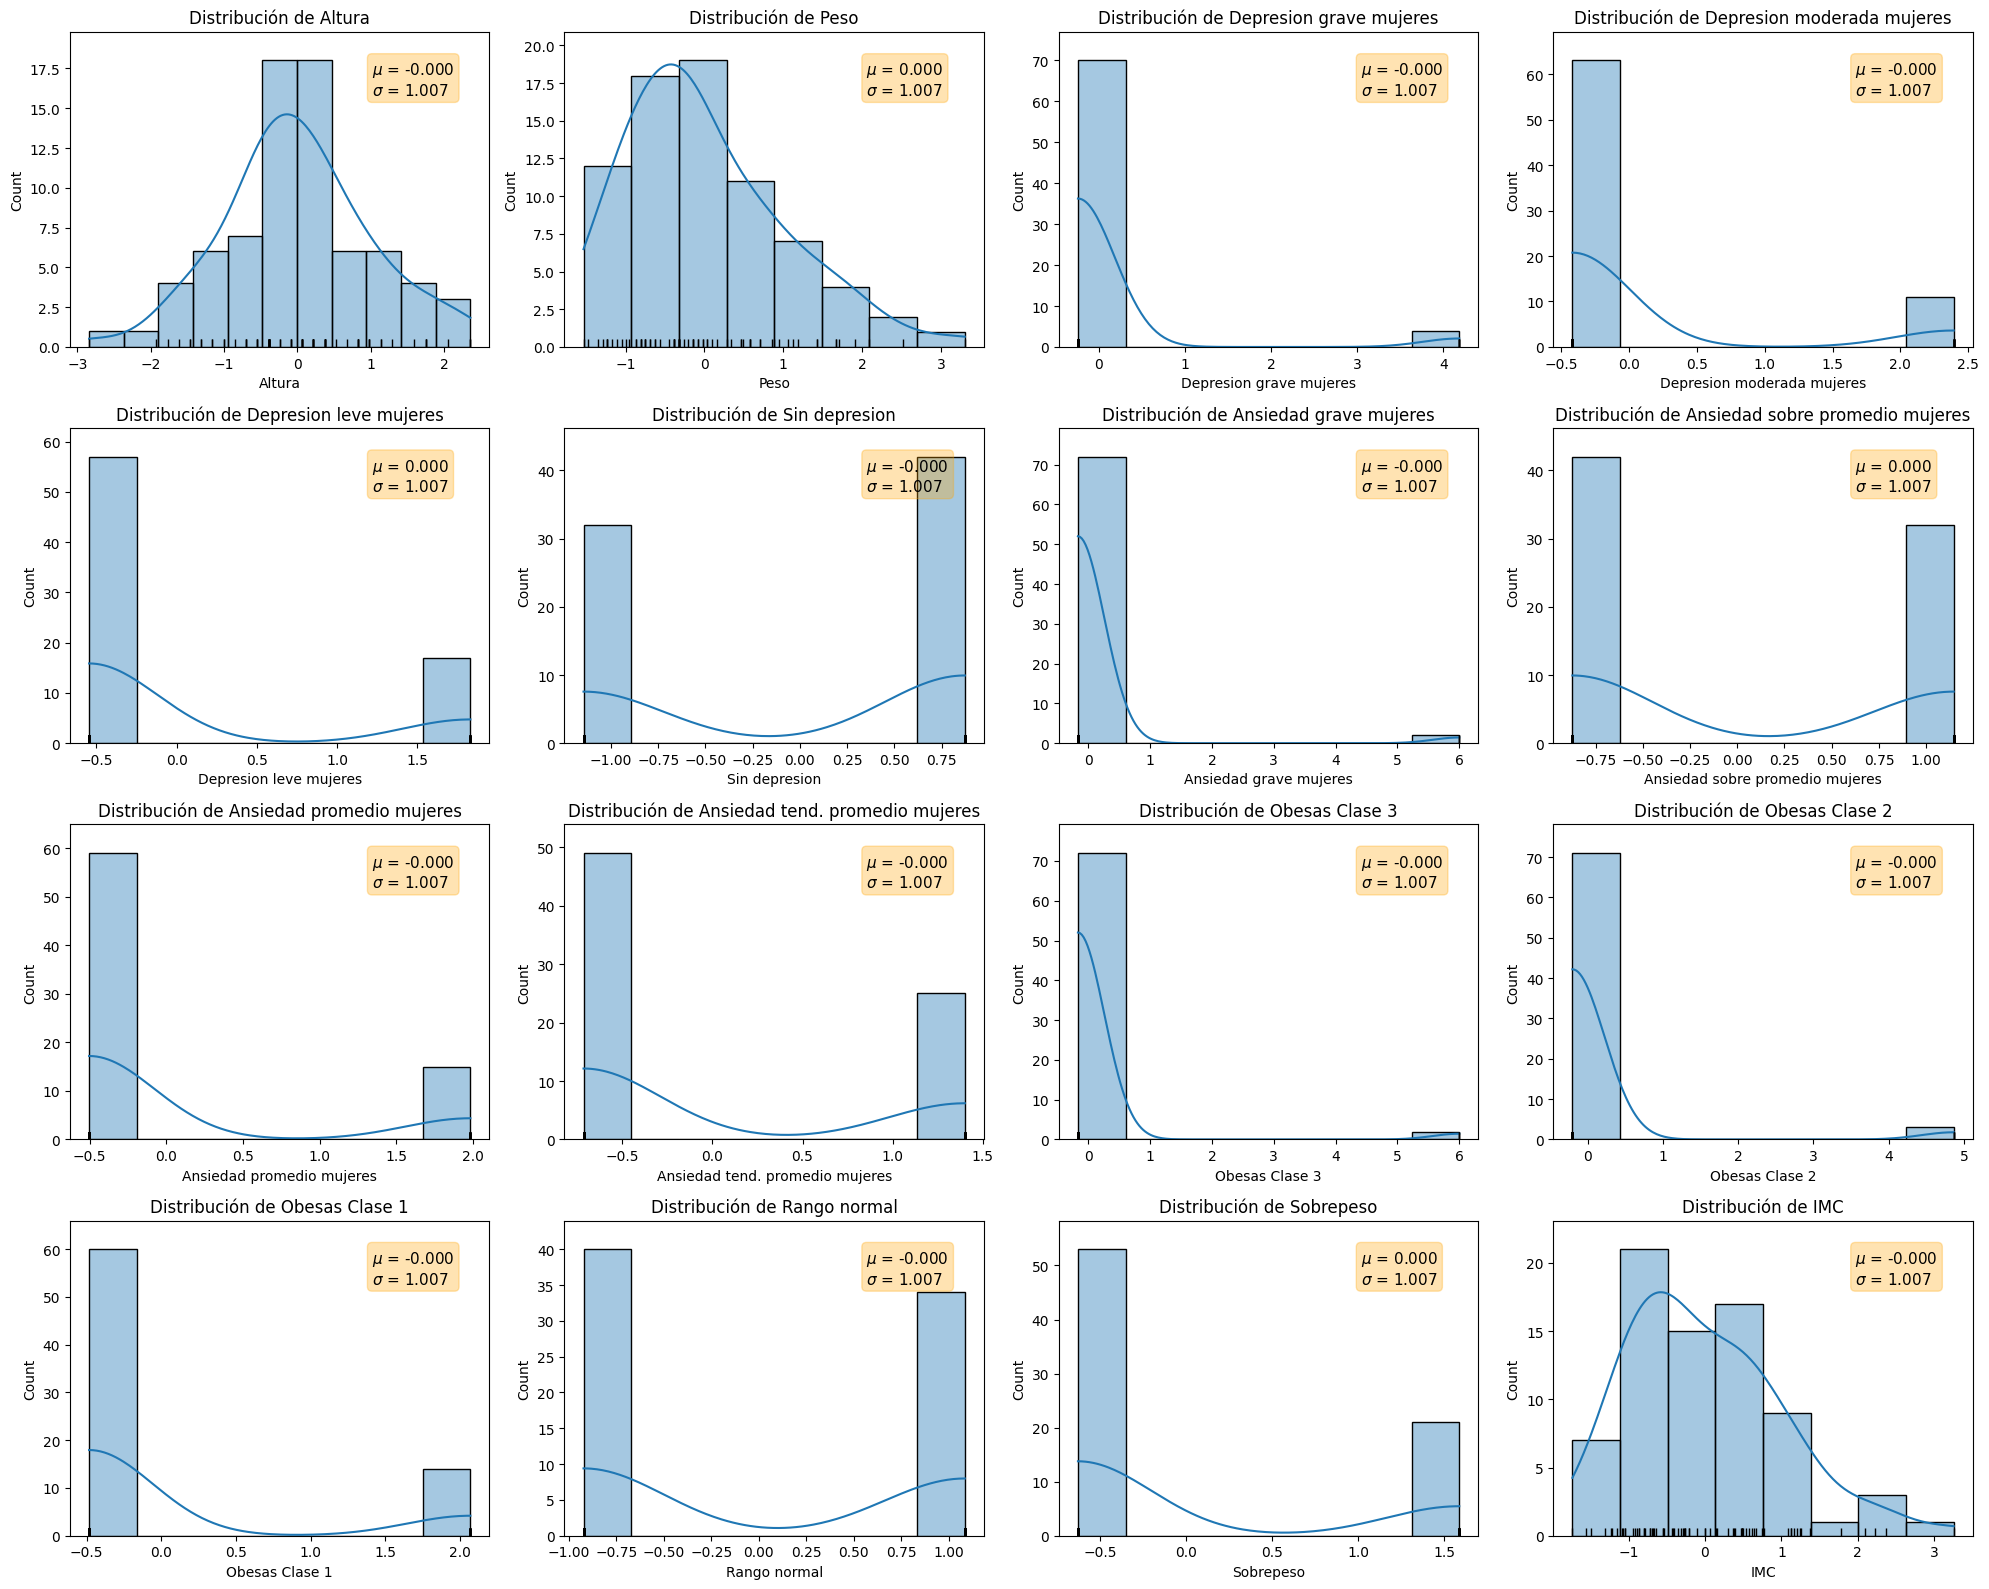

In [ ]:
print_dataset(scaled_data, 4, 4)

In [ ]:
scaled_data['Tipo de sobrepeso'] = df['Tipo de sobrepeso']

In [ ]:
#Permite obtener los estadísticos descriptivos
scaled_data.describe()

,Altura,Peso,Depresion grave mujeres,Depresion moderada mujeres,Depresion leve mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad sobre promedio mujeres,Ansiedad promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 3,Obesas Clase 2,Obesas Clase 1,Rango normal,Sobrepeso,IMC,Tipo de sobrepeso
count,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,7.400000e+01,74.000000
mean,-1.539872e-15,1.815365e-16,-1.425286e-17,-2.700542e-17,3.300663e-17,-3.000603e-18,-2.775558e-17,1.500301e-17,-9.901989e-17,-6.001206e-18,-2.775558e-17,-1.650332e-17,-7.051417e-17,-1.800362e-17,7.501507e-17,-4.448394e-16,2.608108
std,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.006826e+00,1.431711
min,-2.841631e+00,-1.534550e+00,-2.390457e-01,-4.178554e-01,-5.461187e-01,-1.145644e+00,-1.666667e-01,-8.728716e-01,-5.042195e-01,-7.142857e-01,-1.666667e-01,-2.055566e-01,-4.830459e-01,-9.219544e-01,-6.294652e-01,-1.735479e+00,0.000000
25%,-5.094269e-01,-7.485651e-01,-2.390457e-01,-4.178554e-01,-5.461187e-01,-1.145644e+00,-1.666667e-01,-8.728716e-01,-5.042195e-01,-7.142857e-01,-1.666667e-01,-2.055566e-01,-4.830459e-01,-9.219544e-01,-6.294652e-01,-7.660263e-01,2.250000
50%,-1.239984e-02,-2.346517e-01,-2.390457e-01,-4.178554e-01,-5.461187e-01,8.728716e-01,-1.666667e-01,-8.728716e-01,-5.042195e-01,-7.142857e-01,-1.666667e-01,-2.055566e-01,-4.830459e-01,-9.219544e-01,-6.294652e-01,-2.332822e-01,3.000000
75%,4.846272e-01,5.815636e-01,-2.390457e-01,-4.178554e-01,-5.461187e-01,8.728716e-01,-1.666667e-01,1.145644e+00,-5.042195e-01,1.400000e+00,-1.666667e-01,-2.055566e-01,-4.830459e-01,1.084652e+00,1.588650e+00,5.659546e-01,4.000000
max,2.358037e+00,3.302281e+00,4.183300e+00,2.393172e+00,1.831104e+00,8.728716e-01,6.000000e+00,1.145644e+00,1.983263e+00,1.400000e+00,6.000000e+00,4.864840e+00,2.070197e+00,1.084652e+00,1.588650e+00,3.254794e+00,4.000000


In [ ]:
scaled_data.corr()

,Altura,Peso,Depresion grave mujeres,Depresion moderada mujeres,Depresion leve mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad sobre promedio mujeres,Ansiedad promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 3,Obesas Clase 2,Obesas Clase 1,Rango normal,Sobrepeso,IMC,Tipo de sobrepeso
Altura,1.000000,0.359658,0.188963,0.038389,-0.048531,-0.072607,0.099888,-0.094254,0.016881,0.050131,-0.180487,0.243700,0.057330,0.117123,-0.220963,-0.012133,-0.164442
Peso,0.359658,1.000000,0.157086,0.163084,0.111722,-0.283670,-0.109646,0.018150,0.036143,-0.012139,0.333730,0.513099,0.457613,-0.690963,0.021742,0.924868,-0.551609
Depresion grave mujeres,0.188963,0.157086,1.000000,-0.099887,-0.130547,-0.273861,0.328688,0.153232,-0.120532,-0.170747,-0.039841,0.253877,0.037115,0.019446,-0.150471,0.075820,-0.144252
Depresion moderada mujeres,0.038389,0.163084,-0.099887,1.000000,-0.228199,-0.478714,0.164610,0.095328,0.072784,-0.218153,0.164610,-0.085893,0.186115,-0.080345,-0.094507,0.180439,-0.178692
Depresion leve mujeres,-0.048531,0.111722,-0.130547,-0.228199,1.000000,-0.625658,-0.091020,-0.022783,0.124184,-0.050482,0.107082,0.050626,0.064287,-0.116728,0.012518,0.138230,-0.075405
Sin depresion,-0.072607,-0.283670,-0.273861,-0.478714,-0.625658,1.000000,-0.190941,-0.119048,-0.102694,0.277448,-0.190941,-0.097188,-0.205172,0.147932,0.125914,-0.281547,0.258183
Ansiedad grave mujeres,0.099888,-0.109646,0.328688,0.164610,-0.091020,-0.190941,1.000000,-0.145479,-0.084037,-0.119048,-0.027778,-0.034259,-0.080508,0.180775,-0.104911,-0.151416,0.045932
Ansiedad sobre promedio mujeres,-0.094254,0.018150,0.153232,0.095328,-0.022783,-0.119048,-0.145479,1.000000,-0.440119,-0.623480,0.022731,0.097188,-0.003765,-0.038462,-0.004906,0.054984,-0.027996
Ansiedad promedio mujeres,0.016881,0.036143,-0.120532,0.072784,0.124184,-0.102694,-0.084037,-0.440119,1.000000,-0.360157,-0.084037,-0.103646,0.185570,0.007292,-0.093705,0.034125,-0.144708
Ansiedad tend. promedio mujeres,0.050131,-0.012139,-0.170747,-0.218153,-0.050482,0.277448,-0.119048,-0.623480,-0.360157,1.000000,0.057143,-0.001958,-0.126183,-0.027891,0.120755,-0.034684,0.136574


<Axes: >

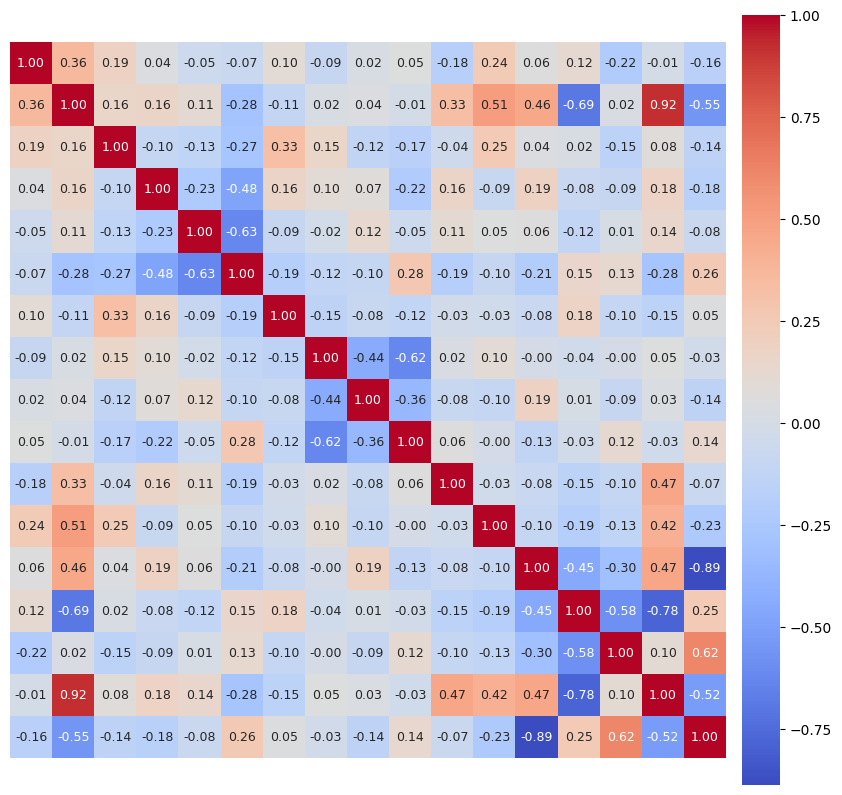

In [ ]:
corr = scaled_data.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= False, yticklabels= False, ax=ax, cbar_kws={"fraction": 0.056, "pad": 0.02},
           cmap= 'coolwarm')

<Axes: >

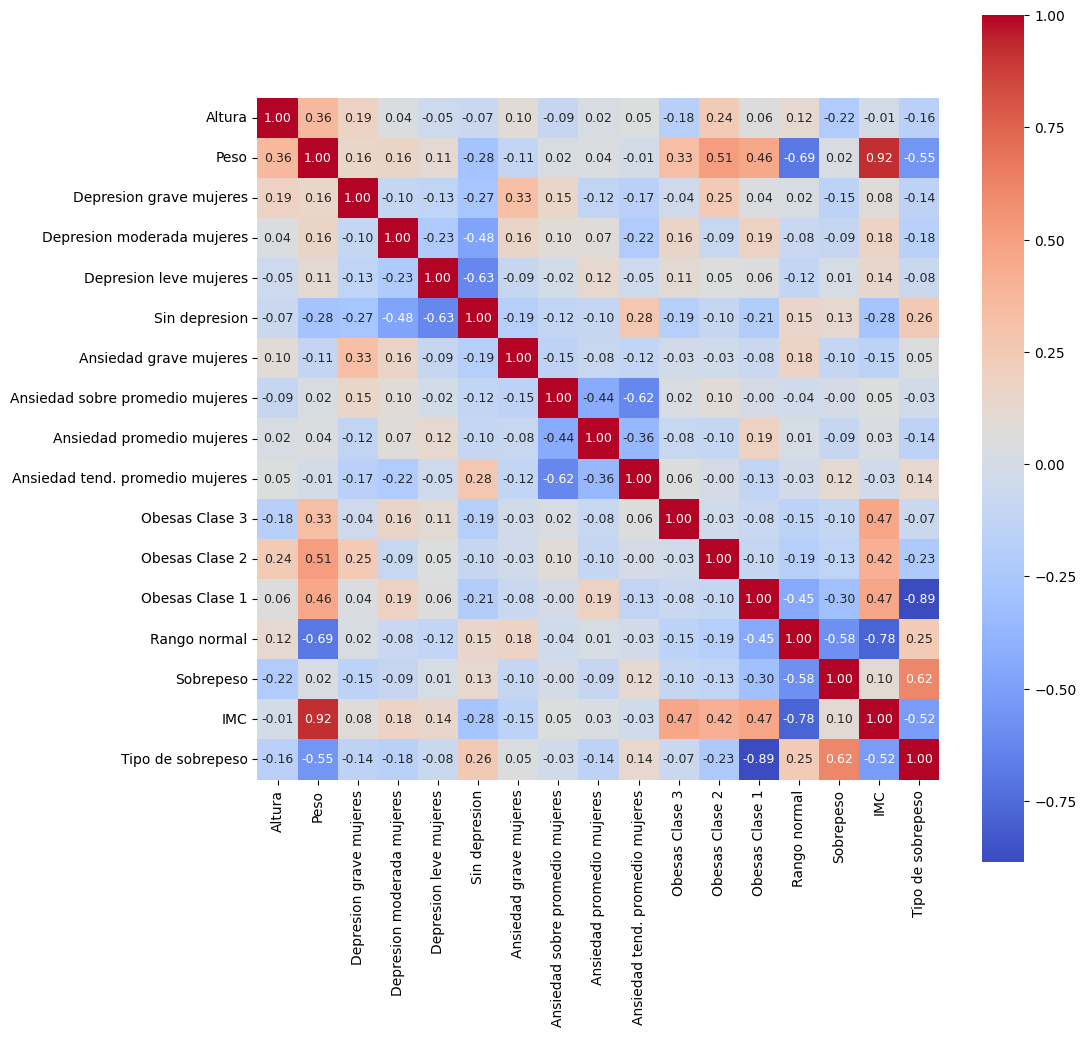

In [ ]:
corr = scaled_data.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Volvemos a verificar atípicos

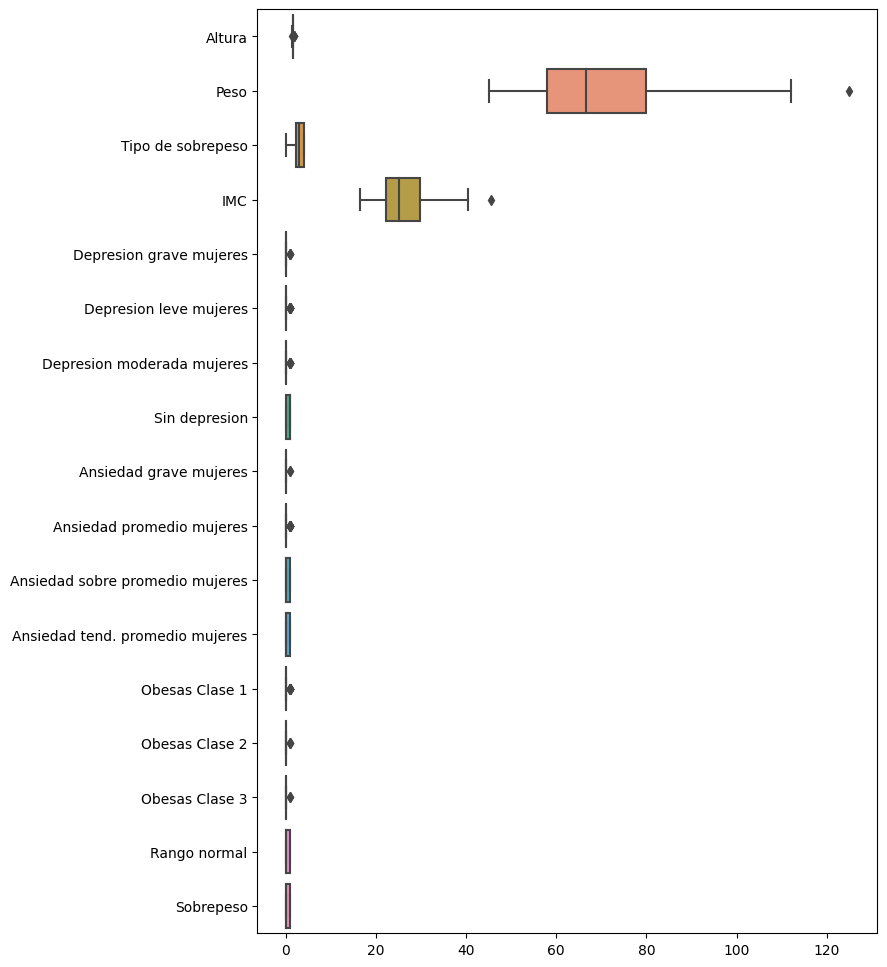

In [ ]:
plt.figure(figsize = (8, 12))
sns.boxplot(data = df, width = 0.8, orient = 'h')
plt.show()

Interpretación de la sección
Se realizado el tratamiento de los datos, se procede a validar los resultados, se dialoga con el experto quien manifiesta que el atípico de IMC y peso no debe ser descartado y debe formar parte del entrenamiento, ahora la nueva dataset está conformada por 16 atributos, los mismos atributos serán utilizado como el nuevo espacio de características para entrenar el modelo.
Se implementa la estandarización para reescalar los datos con media=0 y desviación=1

###1.4.3. TSNE

Para identificar visualmente los patrones y agrupaciones en el conjunto de datos se aplica la técnica no lineal T-SNE

<Axes: >

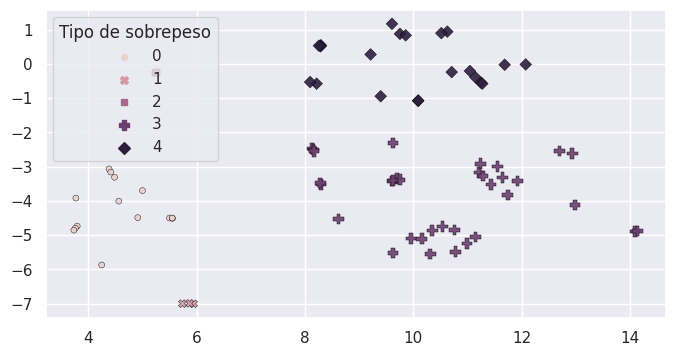

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_data)

sns.set(rc={"figure.figsize":(8, 4)})
sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1] , data = scaled_data, size = 'Tipo de sobrepeso', hue = 'Tipo de sobrepeso', alpha = 0.90, edgecolor = "black", style='Tipo de sobrepeso')

# Entrenamiento del algoritmo

##2.1. SMOTE (Synthetic Minority Over-sampling Technique)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = scaled_data.drop('Tipo de sobrepeso', axis=1)
y = scaled_data['Tipo de sobrepeso']

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

# Contar las clases antes del sobre muestreo
print('Distribución de clases antes del sobre muestreo:', Counter(y))

# Reducir el número de vecinos más cercanos (n_neighbors)
k_neighbors = min(sum(y == 0), sum(y == 1), sum(y == 2)) - 1

# Aplicar SMOTE con el nuevo valor de n_neighbors
smote = SMOTE(k_neighbors=k_neighbors)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Contar las clases después del sobre muestreo
print('Distribución de clases después del sobre muestreo:', Counter(y_resampled))

Distribución de clases antes del sobre muestreo: Counter({3: 34, 4: 21, 0: 14, 1: 3, 2: 2})
Distribución de clases después del sobre muestreo: Counter({4: 34, 3: 34, 2: 34, 0: 34, 1: 34})


In [ ]:
X_resampled

,Altura,Peso,Depresion grave mujeres,Depresion moderada mujeres,Depresion leve mujeres,Sin depresion,Ansiedad grave mujeres,Ansiedad sobre promedio mujeres,Ansiedad promedio mujeres,Ansiedad tend. promedio mujeres,Obesas Clase 3,Obesas Clase 2,Obesas Clase 1,Rango normal,Sobrepeso,IMC
0,-1.924042,-0.325342,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,1.145644,-0.504219,-0.714286,-0.166667,-0.205557,-0.483046,-0.921954,1.588650,0.397453
1,0.369929,-0.567184,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,1.145644,-0.504219,-0.714286,-0.166667,-0.205557,-0.483046,1.084652,-0.629465,-0.721307
2,-1.618180,2.093074,-0.239046,2.393172,-0.546119,-1.145644,-0.166667,1.145644,-0.504219,-0.714286,6.000000,-0.205557,-0.483046,-0.921954,-0.629465,3.254794
3,-0.394728,-0.990407,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,1.145644,-0.504219,-0.714286,-0.166667,-0.205557,-0.483046,1.084652,-0.629465,-0.947738
4,0.369929,-0.385803,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,-0.872872,1.983263,-0.714286,-0.166667,-0.205557,-0.483046,1.084652,-0.629465,-0.531149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,-1.477355,-0.088287,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,-0.872872,-0.504219,1.400000,-0.166667,-0.205557,-0.483046,-0.921954,1.588650,0.498119
166,-2.477074,-0.799056,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,1.145644,-0.504219,-0.714286,-0.166667,-0.205557,-0.483046,-0.921954,1.588650,0.001007
167,0.597463,0.491609,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,-0.872872,-0.504219,1.400000,-0.166667,-0.205557,-0.483046,-0.921954,1.588650,0.304900
168,0.941213,0.355710,-0.239046,-0.417855,-0.546119,0.872872,-0.166667,-0.872872,-0.504219,1.400000,-0.166667,-0.205557,-0.483046,-0.921954,1.588650,0.035799


In [ ]:
y_resampled

0      4
1      3
2      2
3      3
4      3
      ..
165    4
166    4
167    4
168    4
169    4
Name: Tipo de sobrepeso, Length: 170, dtype: int64

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 136 datos para entrenamiento y 34 datos para prueba


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

1.0

In [ ]:
lr.score(X_test, y_test)

1.0

In [ ]:
y_pred = lr.predict(X_test)
print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

MSE:2.0685122026700594e-28 RMSE:1.4382323187406337e-14 r2:1.0


¿Como influye cada variable en la predicción?

In [ ]:
coef = pd.Series(data=np.round(lr.coef_,2),index = X.columns)
coef.sort_values(ascending=False)

Sobrepeso                          0.69
Rango normal                       0.27
Altura                            -0.00
Peso                               0.00
Depresion grave mujeres            0.00
Depresion moderada mujeres         0.00
Depresion leve mujeres             0.00
Sin depresion                     -0.00
Ansiedad grave mujeres            -0.00
Ansiedad sobre promedio mujeres    0.00
Ansiedad promedio mujeres         -0.00
Ansiedad tend. promedio mujeres    0.00
IMC                               -0.00
Obesas Clase 3                    -0.07
Obesas Clase 2                    -0.29
Obesas Clase 1                    -0.96
dtype: float64

##2.2. Random Forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Definir los hiperparámetros a buscar
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Crear una instancia del modelo de árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion_mat = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000         6
           2     1.0000    1.0000    1.0000         4
           3     1.0000    1.0000    1.0000         9
           4     1.0000    1.0000    1.0000         7

    accuracy                         1.0000        34
   macro avg     1.0000    1.0000    1.0000        34
weighted avg     1.0000    1.0000    1.0000        34



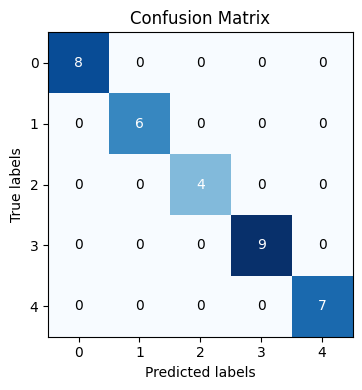

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matc=confusion_matrix(y_test, y_pred,  labels=[0, 1, 2, 3, 4])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()

##2.3. SVM

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# Definir los hiperparámetros a buscar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Crear una instancia del modelo SVM
svm_model = SVR()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) utilizando el mejor modelo
mse = mean_squared_error(y_test, y_pred)
print('Mejores hiperparámetros:', best_params)
print('Error cuadrático medio:', mse)

print(f'MSE:{mean_squared_error(y_test,y_pred)} RMSE:{np.sqrt(mean_squared_error(y_test,y_pred))} r2:{r2_score(y_test,y_pred)}')

Mejores hiperparámetros: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Error cuadrático medio: 0.004235300141976062
MSE:0.004235300141976062 RMSE:0.06507918363022129 r2:0.9980792440313361


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Definir los hiperparámetros a buscar
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Crear una instancia del modelo SVM
svm_model = SVC()

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo
y_pred = best_model.predict(X_test)

# Realizar validación cruzada k-fold con 5 divisiones
scores = cross_val_score(svm_model, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Scores de Validación Cruzada:", scores)
print("Puntaje medio:", scores.mean())

Scores de Validación Cruzada: [0.93333333 0.86666667 0.86666667 0.93333333 1.        ]
Puntaje medio: 0.9200000000000002


# Análisis de los resultados



*   En primer lugar, se integra los resultados de los test del STAI y BECK en conjunto con otras variables de importancia, posterior, se verifica los valores nulos y valores atípicos. Debido a que los test presentan variables ordinales se utiliza el método de codificación DUMMY un grupo de bits entre los cuales las combinaciones legales de valores son aquellas con un solo bit alto (1) y el resto un bit bajo (0). Para el estudio el número de combinaciones está dado por:
2n=24=16
*   Debido a la naturaleza de los datos, se aplica estandarización para reescalar los datos con media=0 y desviación=1.
*   A fin de balancear la etiquetas, se aplica el método SMOTE para generar nuevas muestras sintéticas de las clases minoritarias y equilibrar las proporciones de las clases en el conjunto de datos a entrenar, a fin de, garantiza que cada subgrupo dentro de la población reciba una representación adecuada dentro de la muestra. Adicional se valida con el muestreo estratificado.
*   Finalmente, se aplica random forest y SVM, algoritmos con métricas distintas de evalucación, se compara resultados. Para el presente estudio, los algoritmos propuestos funcionan apropiadamente.